In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df=pd.read_csv('Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
df.shape

(30, 3)

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


find the skewness of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [8]:
df = df.drop(columns=['Unnamed: 0'],errors='ignore')
df.to_csv("Salary_dataset.csv", index=False)
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Skewness for YearsExperience: 0.37956024064804234


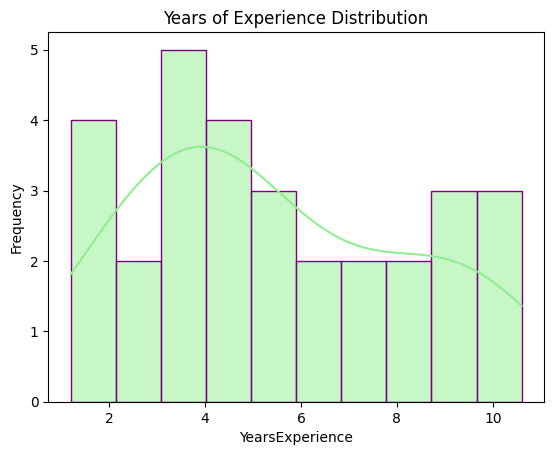

In [9]:
print("Skewness for YearsExperience:", df['YearsExperience'].skew())
plt.figure()
sns.histplot(df['YearsExperience'], bins=10, color='lightgreen', edgecolor='purple', kde=True)
plt.title('Years of Experience Distribution')
plt.xlabel('YearsExperience')
plt.ylabel('Frequency')
plt.show()

Skewness for Salary: 0.35411967922959153


<Axes: xlabel='Salary', ylabel='Frequency'>

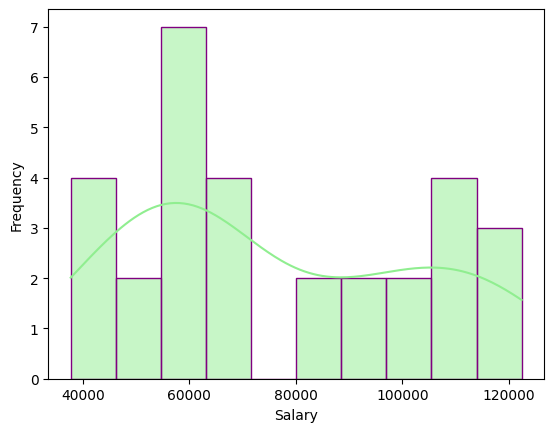

In [10]:
print("Skewness for Salary:", df['Salary'].skew())
plt.figure()
plt.xlabel('Salary')
plt.ylabel('Frequency')
sns.histplot(df['Salary'], bins=10, color='lightgreen', edgecolor='purple', kde=True)


Correlation Matrix:
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


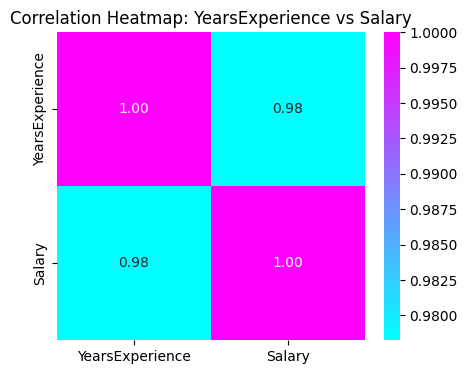

In [11]:
corr = df[['YearsExperience', 'Salary']].corr()
print("\nCorrelation Matrix:")
print(corr)
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='cool', fmt=".2f", square=True)
plt.title("Correlation Heatmap: YearsExperience vs Salary")
plt.show()

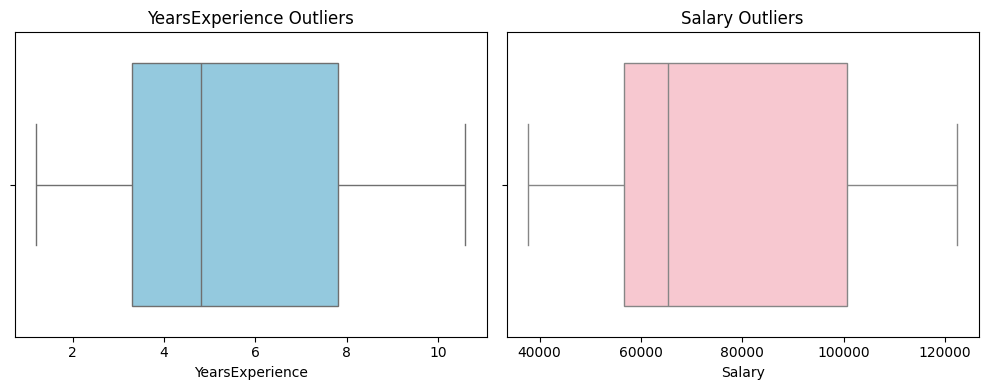

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['YearsExperience'], color='skyblue')
plt.title('YearsExperience Outliers')
plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'], color='pink')
plt.title('Salary Outliers')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Slope: 9423.82
Intercept: 24380.20
Predicted Salary at 8 years: 99770.72
R² Score (Test): 90.24%
Mean Squared Error (MSE): 49830096.86
Mean Absolute Error (MAE): 6286.45
Root Mean Squared Error (RMSE): 7059.04


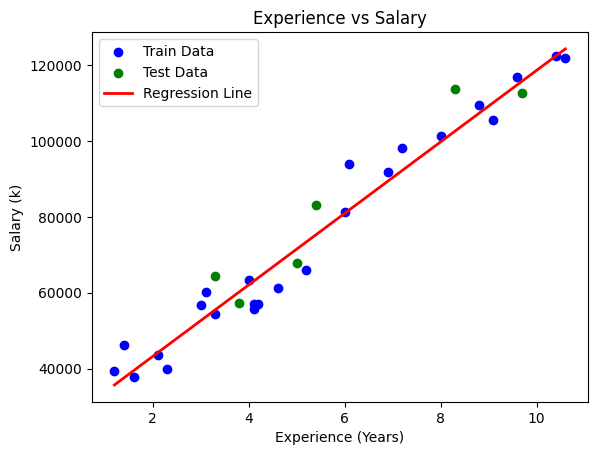

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

slope = model.coef_[0]
intercept = model.intercept_
pred_experience = 8
predicted_salary = model.predict([[pred_experience]])[0]
r2_test = r2_score(y_test, y_test_pred) * 100
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Predicted Salary at {pred_experience} years: {predicted_salary:.2f}")
print(f"R² Score (Test): {r2_test:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (k)')
plt.legend()
plt.show()


In [14]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved successfully!")

Model saved successfully!
